<a href="https://colab.research.google.com/github/Priyuuuuu/Codecasa-Task2/blob/main/Task_2_Priyaa_credit_card_fraud_detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [7]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [8]:
import os
Root = "/content/drive/MyDrive/dataset"
os.chdir(Root)

In [9]:
import pandas as pd

# Load the dataset
data = pd.read_csv("/content/drive/MyDrive/dataset/creditcard.csv")

Missing Values:
Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64


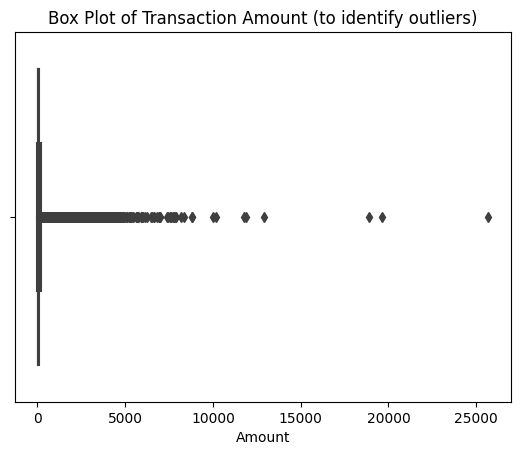

Statistics about Outliers in the 'Amount' Column:
Lower Bound: -101.7475
Upper Bound: 184.5125
Number of Outliers: 31904
Percentage of Outliers: 11.201971861646658 %


In [10]:
import seaborn as sns
import matplotlib.pyplot as plt

# Check for missing values
missing_values = data.isnull().sum()
print("Missing Values:")
print(missing_values)

# Check for outliers in the 'Amount' column using box plot
sns.boxplot(x=data['Amount'])
plt.title('Box Plot of Transaction Amount (to identify outliers)')
plt.show()

# Print statistics about outliers in the 'Amount' column
Q1 = data['Amount'].quantile(0.25)
Q3 = data['Amount'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

outliers = data[(data['Amount'] < lower_bound) | (data['Amount'] > upper_bound)]
print("Statistics about Outliers in the 'Amount' Column:")
print("Lower Bound:", lower_bound)
print("Upper Bound:", upper_bound)
print("Number of Outliers:", len(outliers))
print("Percentage of Outliers:", len(outliers) / len(data) * 100, "%")

In [11]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import RandomOverSampler

# Feature scaling
scaler = StandardScaler()
data['Amount'] = scaler.fit_transform(data['Amount'].values.reshape(-1, 1))
data['Time'] = scaler.fit_transform(data['Time'].values.reshape(-1, 1))

# Split the data into features (X) and target (y)
X = data.drop(columns=['Class'])
y = data['Class']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Balance the dataset using oversampling
oversampler = RandomOverSampler(sampling_strategy='auto', random_state=42)
X_train_resampled, y_train_resampled = oversampler.fit_resample(X_train, y_train)


In [12]:
from sklearn.linear_model import LogisticRegression

# Create and train the Logistic Regression model
model = LogisticRegression(random_state=42)
model.fit(X_train_resampled, y_train_resampled)

LogisticRegression(random_state=42)

In [13]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Make predictions on the test set
y_pred = model.predict(X_test)

# Calculate evaluation metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1 Score: {f1}")

Accuracy: 0.9761946560865138
Precision: 0.06258692628650904
Recall: 0.9183673469387755
F1 Score: 0.1171875


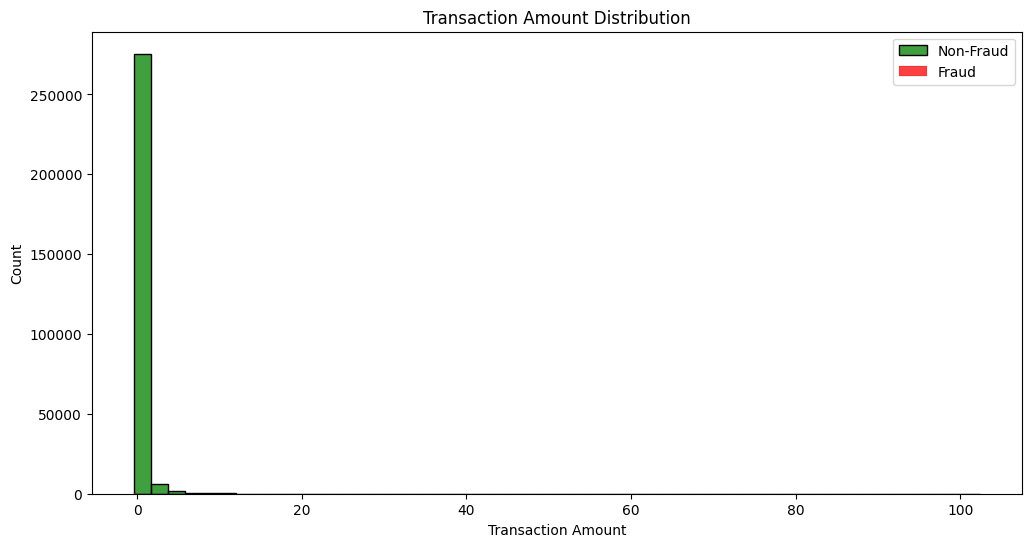

In [14]:
plt.figure(figsize=(12, 6))
sns.histplot(data[data['Class'] == 0]['Amount'], bins=50, color='g', label='Non-Fraud')
sns.histplot(data[data['Class'] == 1]['Amount'], bins=50, color='r', label='Fraud')
plt.xlabel('Transaction Amount')
plt.ylabel('Count')
plt.legend()
plt.title('Transaction Amount Distribution')
plt.show()

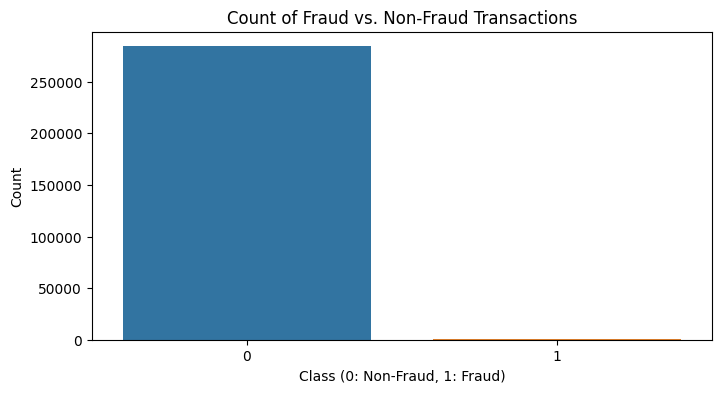

In [15]:
import seaborn as sns
import matplotlib.pyplot as plt

# Countplot of fraud vs. non-fraud transactions
plt.figure(figsize=(8, 4))
sns.countplot(data=data, x='Class')
plt.title('Count of Fraud vs. Non-Fraud Transactions')
plt.xlabel('Class (0: Non-Fraud, 1: Fraud)')
plt.ylabel('Count')
plt.show()

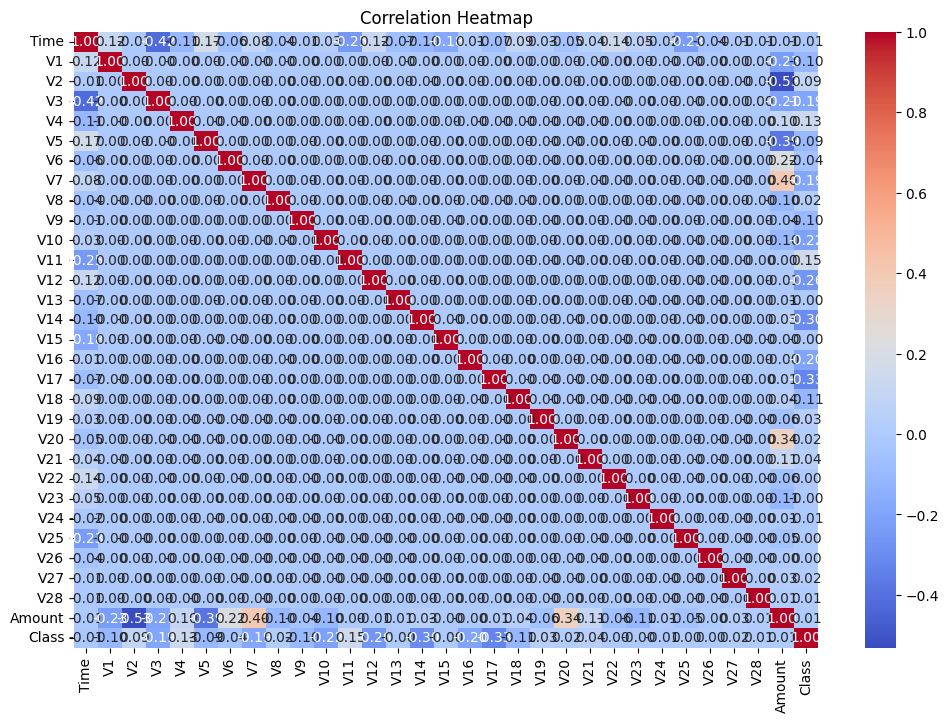

In [16]:
# Correlation heatmap
correlation_matrix = data.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, cmap='coolwarm', annot=True, fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()

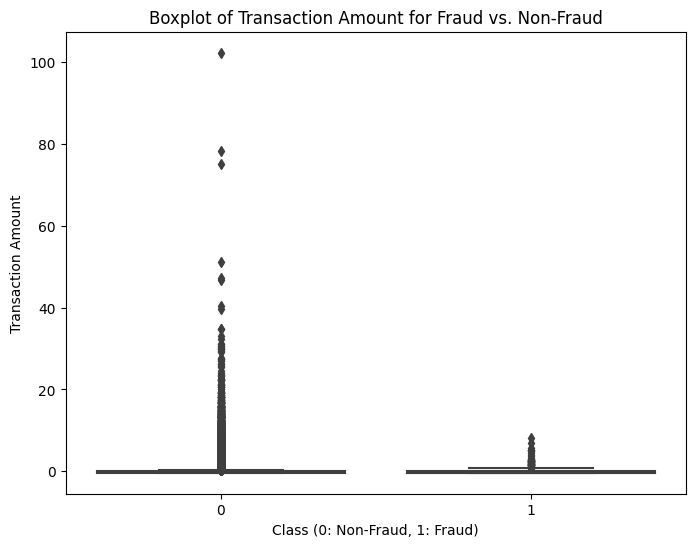

In [17]:
# Boxplot of transaction amounts for fraud and non-fraud cases
plt.figure(figsize=(8, 6))
sns.boxplot(data=data, x='Class', y='Amount')
plt.title('Boxplot of Transaction Amount for Fraud vs. Non-Fraud')
plt.xlabel('Class (0: Non-Fraud, 1: Fraud)')
plt.ylabel('Transaction Amount')
plt.show()

<ipython-input-18-b3ca7a9acbe4>:3: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data[data['Class'] == 0]['Amount'], label='Non-Fraud', shade=True, color='g')
<ipython-input-18-b3ca7a9acbe4>:4: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data[data['Class'] == 1]['Amount'], label='Fraud', shade=True, color='r')


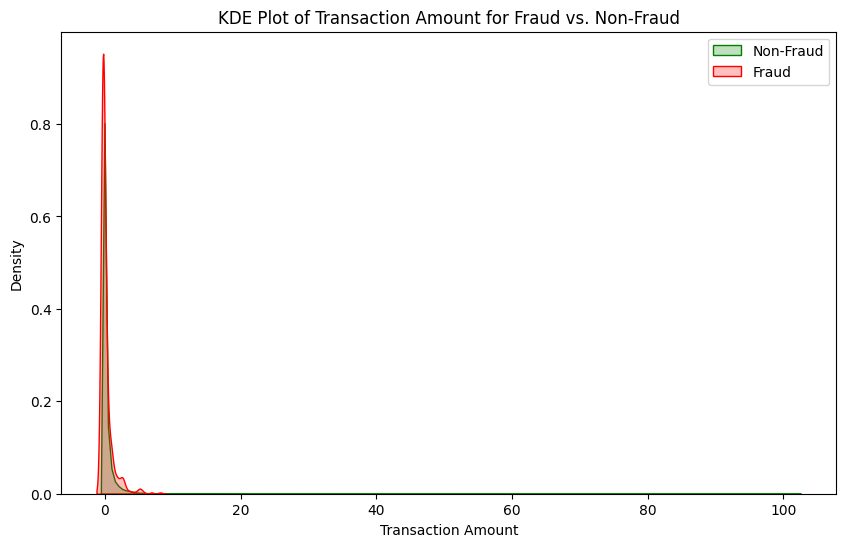

In [18]:

# KDE plot of transaction amount for fraud and non-fraud cases
plt.figure(figsize=(10, 6))
sns.kdeplot(data[data['Class'] == 0]['Amount'], label='Non-Fraud', shade=True, color='g')
sns.kdeplot(data[data['Class'] == 1]['Amount'], label='Fraud', shade=True, color='r')
plt.xlabel('Transaction Amount')
plt.ylabel('Density')
plt.legend()
plt.title('KDE Plot of Transaction Amount for Fraud vs. Non-Fraud')
plt.show()

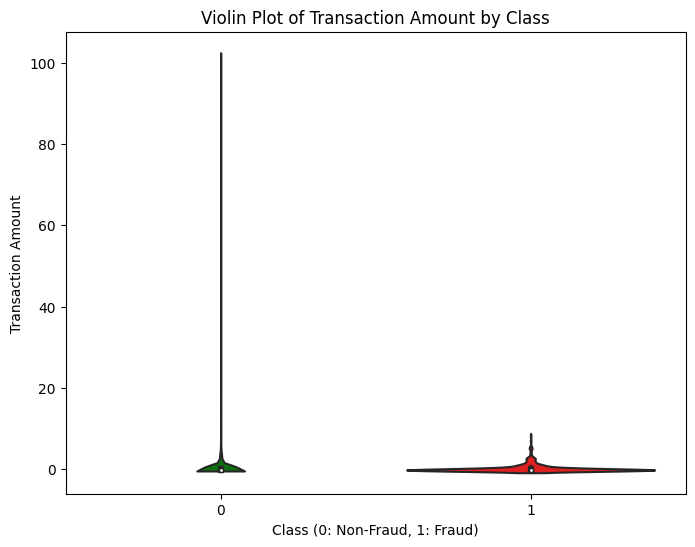

In [19]:
# Violin plot of transaction amount by class
plt.figure(figsize=(8, 6))
sns.violinplot(data=data, x='Class', y='Amount', palette=['g', 'r'])
plt.xlabel('Class (0: Non-Fraud, 1: Fraud)')
plt.ylabel('Transaction Amount')
plt.title('Violin Plot of Transaction Amount by Class')
plt.show()

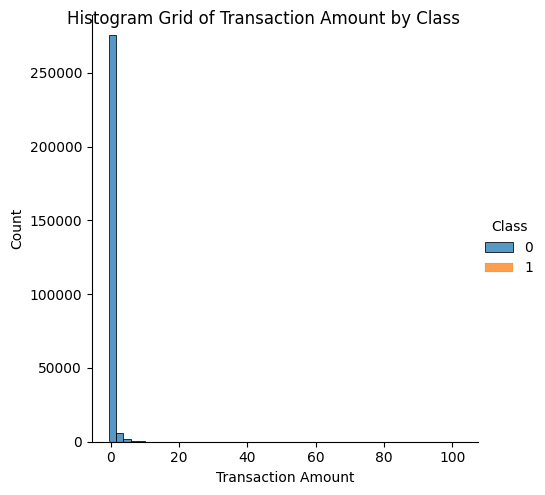

In [20]:
# Create a histogram grid for selected features
grid = sns.FacetGrid(data, hue='Class', height=5)
grid.map(sns.histplot, 'Amount', bins=50)
grid.add_legend()
grid.set_axis_labels('Transaction Amount', 'Count')
plt.suptitle('Histogram Grid of Transaction Amount by Class')
plt.show()

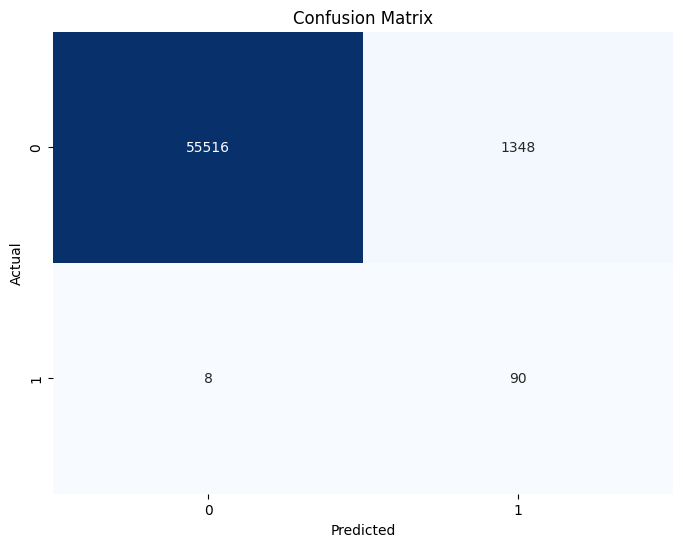

In [21]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import seaborn as sns

# Make predictions on the test set
y_pred = model.predict(X_test)

# Create a confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [22]:
import numpy as np
x = np.array([406,-2.312226542,1.951992011,-1.609850732,3.997905588,-0.522187865,-1.426545319,-2.537387306,1.391657248,-2.770089277,-2.772272145,3.202033207,-2.899907388,-0.595221881,-4.289253782,0.38972412,-1.14074718,-2.830055675,-0.016822468,0.416955705,0.126910559,0.517232371,-0.035049369,-0.465211076,0.320198199,0.044519167,0.177839798,0.261145003,-0.143275875,0])
x = x.reshape(1, -1)
print(x)

[[ 4.06000000e+02 -2.31222654e+00  1.95199201e+00 -1.60985073e+00
   3.99790559e+00 -5.22187865e-01 -1.42654532e+00 -2.53738731e+00
   1.39165725e+00 -2.77008928e+00 -2.77227215e+00  3.20203321e+00
  -2.89990739e+00 -5.95221881e-01 -4.28925378e+00  3.89724120e-01
  -1.14074718e+00 -2.83005568e+00 -1.68224680e-02  4.16955705e-01
   1.26910559e-01  5.17232371e-01 -3.50493690e-02 -4.65211076e-01
   3.20198199e-01  4.45191670e-02  1.77839798e-01  2.61145003e-01
  -1.43275875e-01  0.00000000e+00]]


In [23]:
y = model.predict(x)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


In [24]:
print(y)

if y == 0:
    print("the transaction is classified as non-fraudulent.")
else:
    print("the transaction is classified as fraudulent.")

[0]
the transaction is classified as non-fraudulent.
